<a href="https://colab.research.google.com/github/af1tgc/tf.colab.study/blob/master/Basic_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [24]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_label), (test_images, test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [26]:
train_images.shape

(60000, 28, 28)

In [28]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

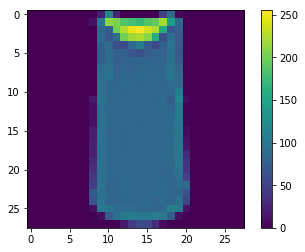

In [35]:
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

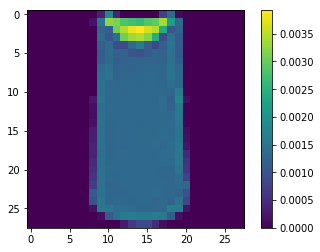

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

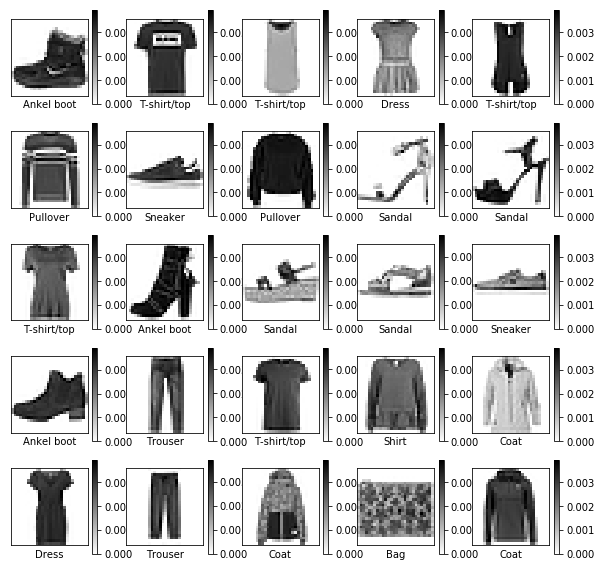

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_label[i]])
  plt.colorbar()
  plt.grid(False)
plt.show()

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.09),
  keras.layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.9189 - accuracy: 0.6591
Epoch 2/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5838 - accuracy: 0.7872
Epoch 3/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.5210 - accuracy: 0.8129
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.4818 - accuracy: 0.8273
Epoch 5/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4551 - accuracy: 0.8368


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_label, verbose=2)
print(test_loss, test_acc)

10000/1 - 1s - loss: 0.3864 - accuracy: 0.8342
0.45881062269210815 0.8342


In [0]:
predictions = model.predict(test_images)

In [50]:
predictions[0]

array([1.2529645e-07, 9.6098084e-08, 6.0111216e-07, 1.7604036e-05,
       3.2462857e-08, 1.8382487e-01, 5.5573804e-07, 3.0094177e-01,
       8.0355434e-03, 5.0717884e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [53]:
test_label[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label], 100*np.max(predictions_array),
                                        class_name[true_label]), color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

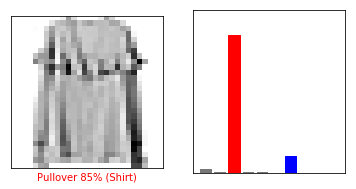

In [66]:
i = 8373
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_label)
plt.show()

In [0]:
img = test_images[0]

In [0]:
img = (np.expand_dims(img, 0))

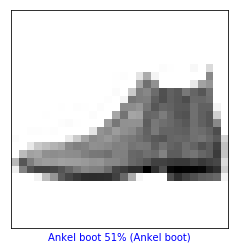

In [69]:
plot_image(0, model.predict(img), test_label, test_images)